In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
%run ../src/models/feature_loader.py
feature_loader = FeatureTensorLoader(lags=3, SRC_PATH='../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/')

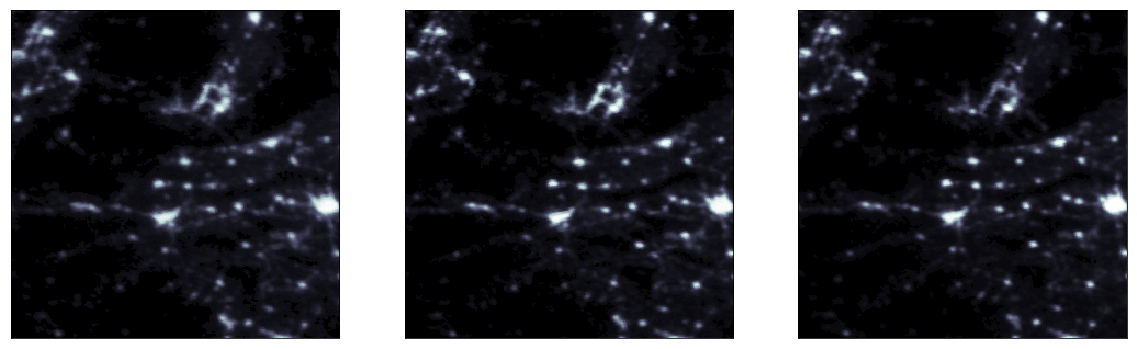

In [42]:
feature, target = feature_loader.load(14000)
fig, ax = plt.subplots(1,3,figsize=(20,20))
for i, axi in enumerate(ax.flat):
    axi.imshow(feature[2 - i],cmap='bone')
    axi.set(xticks=[], yticks=[])
plt.show()

In [29]:
checkpoint_file = tf.train.latest_checkpoint('../models/simple_feed_forward/')
graph=tf.Graph()
with graph.as_default():
    sess = tf.Session()
    with sess.as_default():
        saver = tf.train.import_meta_graph("{}.meta".format(checkpoint_file))
        saver.restore(sess, checkpoint_file)
        sess.run(tf.global_variables_initializer())
        print(tf.global_variables())

INFO:tensorflow:Restoring parameters from ../models/simple_feed_forward/simple_feed_forward_session
[<tf.Variable 'w1:0' shape=(3, 300, 300) dtype=float32_ref>, <tf.Variable 'b1:0' shape=(300, 300) dtype=float32_ref>, <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>, <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>, <tf.Variable 'w1/Adam:0' shape=(3, 300, 300) dtype=float32_ref>, <tf.Variable 'w1/Adam_1:0' shape=(3, 300, 300) dtype=float32_ref>, <tf.Variable 'b1/Adam:0' shape=(300, 300) dtype=float32_ref>, <tf.Variable 'b1/Adam_1:0' shape=(300, 300) dtype=float32_ref>]


In [35]:
pred = np.load('../models/simple_feed_forward/simple_feed_forward_prediction.npy')
pred.shape

(2, 300, 300, 300)